In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
health_care = pd.read_csv("healthcare_dataset.csv")
health_care_df = pd.DataFrame(health_care)
health_care_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
health_care_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
health_care_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,4854.000000,5110.000000,5110.000000,4854.000000,4665.000000,5110.000000
mean,36517.829354,43.230128,0.097456,0.054012,106.108706,28.906409,0.048728
std,21161.721625,22.587873,0.296607,0.226063,45.310290,7.863326,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.232500,23.600000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.820000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.142500,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                4854 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          4957 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  4854 non-null   float64
 9   bmi                4665 non-null   float64
 10  smoking_status     4957 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
health_care_df.isnull().sum()

id                     0
gender                 0
age                  256
hypertension           0
heart_disease          0
ever_married           0
work_type            153
Residence_type         0
avg_glucose_level    256
bmi                  445
smoking_status       153
stroke                 0
dtype: int64

In [7]:
health_care_df.duplicated().sum()

np.int64(0)

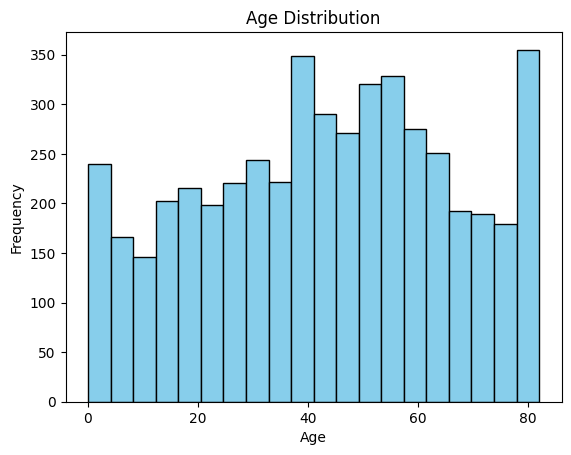

In [8]:
plt.hist(health_care_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [9]:
health_care_df['age'] = health_care_df['age'].round()

In [10]:
health_care_df['age'].unique()

array([67., 61., 80., 49., 79., 81., 74., 69., nan, 78., 54., 50., 64.,
       75., 60., 57., 71., 52., 65., 58., 42., 82., 48., 72., 63., 76.,
       39., 77., 73., 56., 45., 70., 59., 66., 51., 68., 47., 53., 38.,
       55.,  1., 46., 32., 14.,  3.,  8., 37., 40., 35., 20., 44., 25.,
       23., 17., 13.,  4., 16., 22., 27., 43., 30., 29., 11., 21., 18.,
       33., 24., 34., 36., 41.,  5., 26., 31., 12., 62.,  2.,  7.,  9.,
       15., 28., 10.,  0., 19.,  6.])

In [11]:
health_care_df['age'] = health_care_df['age'].fillna(health_care_df['age'].mean())

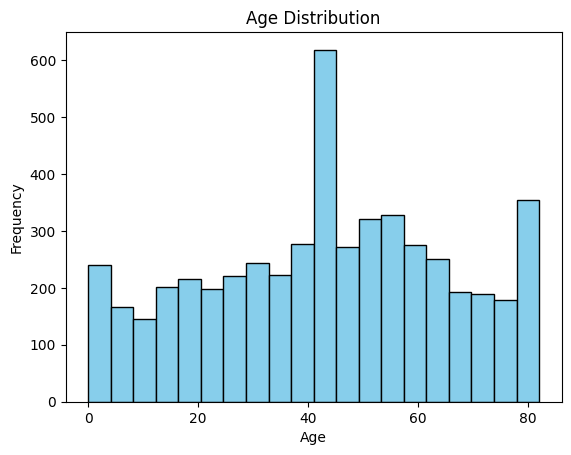

In [12]:
plt.hist(health_care_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [13]:
health_care_df['work_type'].unique()

array(['Private', 'Self-employed', nan, 'Govt_job', 'children',
       'Never_worked'], dtype=object)

In [14]:
health_care_df['work_type'].value_counts()

work_type
Private          2840
Self-employed     793
children          662
Govt_job          640
Never_worked       22
Name: count, dtype: int64

In [15]:
health_care_df['work_type'].isnull().sum()

np.int64(153)

In [16]:
health_care_df['work_type'] = health_care_df['work_type'].fillna(health_care_df['work_type'].mode()[0])

In [17]:
health_care_df['work_type'].isnull().sum()

np.int64(0)

In [18]:
health_care_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  4854 non-null   float64
 9   bmi                4665 non-null   float64
 10  smoking_status     4957 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [19]:
Q1 = health_care_df['avg_glucose_level'].quantile(0.25)
Q3 = health_care_df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR
print(l)
print(u)
outliers = (health_care_df['avg_glucose_level']<l) |(health_care_df['avg_glucose_level']>u)
health_care_df['avg_glucose_level'] = np.where(outliers, health_care_df['avg_glucose_level'].median(), health_care_df['avg_glucose_level'])

21.867500000000007
169.5075


In [20]:
health_care_df['avg_glucose_level'].describe()

count    4854.000000
mean       91.445424
std        21.202442
min        55.120000
25%        77.232500
50%        91.820000
75%       101.300000
max       169.490000
Name: avg_glucose_level, dtype: float64

In [21]:
health_care_df['avg_glucose_level'] = health_care_df['avg_glucose_level'].fillna(health_care_df['avg_glucose_level'].median())

In [22]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4665 non-null   float64
 10  smoking_status     4957 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [23]:
Q1 = health_care_df['bmi'].quantile(0.25)
Q3 = health_care_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR
print(l)
print(u)
outliers = (health_care_df['bmi']<l) |(health_care_df['bmi']>u)
health_care_df['bmi'] = np.where(outliers, health_care_df['bmi'].median(), health_care_df['bmi'])

9.350000000000001
47.35


In [24]:
health_care_df['bmi'].describe()

count    4665.000000
mean       28.301608
std         6.740384
min        10.300000
25%        23.600000
50%        28.100000
75%        32.500000
max        47.300000
Name: bmi, dtype: float64

In [25]:
health_care_df['bmi'] = health_care_df['bmi'].fillna(health_care_df['bmi'].median())

In [26]:
health_care_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       153
stroke                 0
dtype: int64

In [27]:
health_care_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', nan, 'Unknown'],
      dtype=object)

In [28]:
health_care_df['smoking_status'] = health_care_df['smoking_status'].replace('Unknown',np.nan)

In [29]:
health_care_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', nan], dtype=object)

In [30]:
health_care_df['smoking_status'] = health_care_df['smoking_status'].fillna(health_care_df['smoking_status'].mode()[0])

In [31]:
health_care_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Encoding

In [32]:
health_care_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [33]:
health_care_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [34]:
map_gender = {'Male' : 0b00 ,'Female': 0b01 ,'Other': 0b10}

In [35]:
health_care_df['gender'] = health_care_df['gender'].map(map_gender)

In [36]:
health_care_df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [37]:
map_work_type = {'Private' : 0, 'Self-employed' : 1 , 'Govt_job' : 2 , 'children' : 3 , 'Never_worked' : 4}

In [38]:
health_care_df['work_type'] = health_care_df['work_type'].map(map_work_type)

In [39]:
health_care_df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [40]:
map_ever_married = {'Yes': 1,'No' : 0 }

In [41]:
health_care_df['ever_married'] =health_care_df['ever_married'].map(map_ever_married)

In [42]:
health_care_df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [43]:
map_residence_type = {'Urban' : 0 , 'Rural' : 1}

In [44]:
health_care_df['Residence_type'] =health_care_df['Residence_type'].map(map_residence_type)

In [45]:
health_care_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [46]:
map_smoking_status = {'formerly smoked' : 0 , 'never smoked' : 1 , 'smokes' : 2}

In [47]:
health_care_df['smoking_status'] =health_care_df['smoking_status'].map(map_smoking_status)

In [48]:
health_care_df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [49]:
health_care_df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.586301,43.230326,0.097456,0.054012,0.656164,0.811546,0.491977,91.464190,28.284051,0.980822,0.048728
std,21161.721625,0.492941,22.014411,0.296607,0.226063,0.475034,1.110240,0.499985,20.664575,6.440401,0.564515,0.215320
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.930000,24.100000,1.000000,0.000000
50%,36932.000000,1.000000,43.230326,0.000000,0.000000,1.000000,0.000000,0.000000,91.820000,28.100000,1.000000,0.000000
75%,54682.000000,1.000000,60.000000,0.000000,0.000000,1.000000,2.000000,1.000000,100.112500,32.000000,1.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,169.490000,47.300000,2.000000,1.000000


# Normalization

In [50]:
scaler = MinMaxScaler()
health_care_df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(health_care_df[['age', 'avg_glucose_level', 'bmi']])

# Age , Avg_glucose_level , Bmi is normalized from 0 -> 1

In [51]:
health_care_df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.586301,0.527199,0.097456,0.054012,0.656164,0.811546,0.491977,0.317777,0.486055,0.980822,0.048728
std,21161.721625,0.492941,0.268468,0.296607,0.226063,0.475034,1.110240,0.499985,0.180682,0.174065,0.564515,0.215320
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.000000,0.317073,0.000000,0.000000,0.000000,0.000000,0.000000,0.199440,0.372973,1.000000,0.000000
50%,36932.000000,1.000000,0.527199,0.000000,0.000000,1.000000,0.000000,0.000000,0.320888,0.481081,1.000000,0.000000
75%,54682.000000,1.000000,0.731707,0.000000,0.000000,1.000000,2.000000,1.000000,0.393394,0.586486,1.000000,0.000000
max,72940.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [52]:
health_care_df.to_csv("cleaned_data.csv", index=False)